<a href="https://colab.research.google.com/github/Colebeau/cap-comp215/blob/main/lessons/week04-generators.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Generators and Random Numbers
Supplementary week 4 lesson workbook, available on Github from the powderflask/cap-comp215 repository.

As usual, the first code block just imports the modules we will use.

In [43]:
import random
import matplotlib.pyplot as plt
from dataclasses import dataclass
from pprint import pprint
import math
import random

## Examples: generator expressions
Refer to `foundations/generators` notebook for a detailed tutorial on this topic.

In [26]:
neighbours = ((i-1, i, i+1) for i in range(1, 10))
print(neighbours)
# we can pull one item at a time out of a generator using the built-in next() function
print(next(neighbours))
print(next(neighbours))
# we can turn a generator into a list to examine the rest of its elements (though this somewhat defeats the purpose!)
print(list(neighbours))
# Notice: once the "stream" has flowed past, it is empty - there is no way to "replenish" it.
print(list(neighbours))

<generator object <genexpr> at 0x7f9b719f8040>
(0, 1, 2)
(1, 2, 3)
[(2, 3, 4), (3, 4, 5), (4, 5, 6), (5, 6, 7), (6, 7, 8), (7, 8, 9), (8, 9, 10)]
[]


To see what's going on, we can re-write the "generator expression" as a "generator function"...

In [27]:
#friends = ((h+2) for h in range (13))
#for item in friends:
 # print(f'Next Friend:{item}')
#print(list(friends))

def get_friends(n=20):
  for i in range(1,n):
    yield(i-1, i, i+1)
homies = get_friends()
next(homies)
list(homies)



[(1, 2, 3),
 (2, 3, 4),
 (3, 4, 5),
 (4, 5, 6),
 (5, 6, 7),
 (6, 7, 8),
 (7, 8, 9),
 (8, 9, 10),
 (9, 10, 11),
 (10, 11, 12),
 (11, 12, 13),
 (12, 13, 14),
 (13, 14, 15),
 (14, 15, 16),
 (15, 16, 17),
 (16, 17, 18),
 (17, 18, 19),
 (18, 19, 20)]

In [39]:
l1 = (i**2 for i in range (10))
l2= (math.sqrt(f) for f in l1)
l3= (k/3 for k in l2)
list(l3)

[0.0,
 0.3333333333333333,
 0.6666666666666666,
 1.0,
 1.3333333333333333,
 1.6666666666666667,
 2.0,
 2.3333333333333335,
 2.6666666666666665,
 3.0]

In [45]:
def dice_rolls():
  while True:
    yield (random.randint(1,13),random.randint(1,13))

for i, roll in zip(range(10), dice_rolls()):
  print(roll)

(11, 6)
(8, 13)
(1, 6)
(13, 5)
(6, 10)
(3, 10)
(13, 4)
(11, 9)
(3, 3)
(12, 12)


## Pseudo-Random Numbers
Refer to `foundations/pseudo-random generators` notebook for a detailed tutorial on this topic.


In [29]:
# A list of n random numbers - again we are turning a "generator" in to a list
n = 10
[random.random() for i in range(n)]

[0.4778278067846119,
 0.4586441695285647,
 0.9018004821482795,
 0.23262982344985028,
 0.41451542940946673,
 0.6163194198609826,
 0.947333345001415,
 0.619252082862865,
 0.0053950874257699954,
 0.4043544900208311]

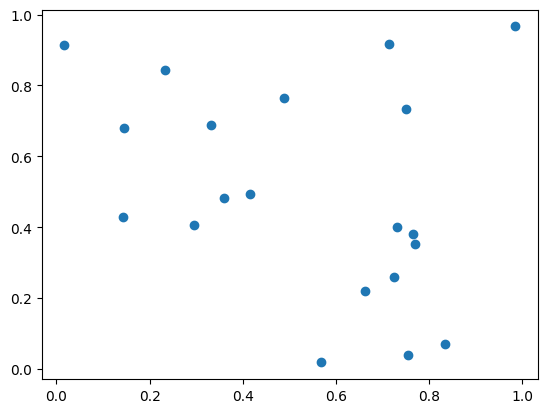

In [30]:
# Scatter plot of random (x,y) coordinates
n = 20
plt.scatter([random.random() for i in range(n)], [random.random() for i in range(n)])
plt.show()

## Chaotic Feedback

 * some mathematical functions produce chaotic patterns when you feed their output back in as the next input.

In [31]:
import time

@dataclass
class TwoDigitRand:
    """ demonstrates 'chaotic feedback' algorithm - not crypographic quality randomness!! """
    seed:int = int(time.time()*10**3)  # clock time in milli-seconds
    a:int = 7

    def __post_init__(self):
        self.seed = self.seed % 100  # allow 2 digit number seeds only!
        self.seed = self.rand() # move to first value in sequence

    def rand(self):
        """ chaotic feedback algorithm - the last output is used as input to compute the next one """
        self.seed = self.seed//10 + self.a*(self.seed%10)
        return self.seed


r = TwoDigitRand()
[r.rand() for i in range(20)]

[33, 24, 30, 3, 21, 9, 63, 27, 51, 12, 15, 36, 45, 39, 66, 48, 60, 6, 42, 18]

Sequence seed: 18


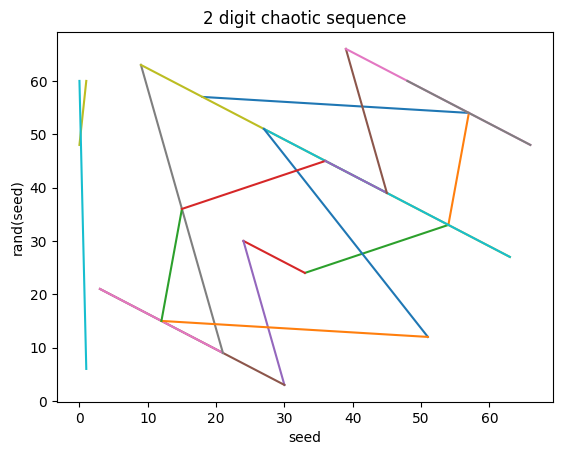

In [32]:
# Scatter plot of (seed, rand(seed))
print("Sequence seed:", r.seed)
pairs = [(r.seed, r.rand()) for i in range(n)]

segments = list(zip(pairs, pairs[1:])) # line segments connecting adjacent (seed, rand()) pairs
plt.plot(*segments)
plt.gca().set(
    title='2 digit chaotic sequence',
    xlabel='seed',
    ylabel='rand(seed)'
)
plt.show()

## Example: computational experiment with random numbers

We'll use the Histogram class developed last week to count the outcomes of the experiment

In [33]:
class Histogram:
    """ A simple histogram with a nice API """
    def __init__(self, title, xlabel='Categories', ylabel='Count'):
        _, ax = plt.subplots()
        ax.set(
            title=title,
            xlabel=xlabel,
            ylabel=ylabel,
        )
        self.ax = ax
        self.counts = {}

    def count(self, category):
        self.counts[category] = self.counts.get(category, 0) + 1

    def plot(self):
        self.ax.bar(self.counts.keys(), self.counts.values())
        plt.show()

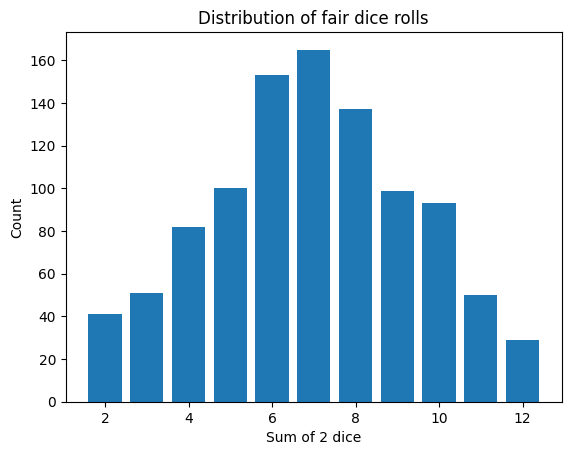

In [34]:
# Experiment: Roll some dice
def roll_dice(sides=6):
    return (random.randint(1,sides), random.randint(1,sides))

# number rolls to use in this experiment
n_rolls = 1000

rolls = Histogram("Distribution of fair dice rolls", xlabel='Sum of 2 dice')
for i in range(n_rolls):
    rolls.count(sum(roll_dice()))

rolls.plot()